# Importar Dataset

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving Aptos_BsAs_Todos.csv to Aptos_BsAs_Todos.csv


In [ ]:
df = pd.read_csv('/content/Aptos_BsAs_Todos.csv')

In [8]:
df.head

<bound method NDFrame.head of                tipo           Barrio  cant_hab  cant_bath  superficie  precio
0              Casa  Velez Sarsfield         3          2          95  199900
1      Departamento            Nuñez         1          1          44  147000
2      Departamento          Almagro         1          1          40   92294
3      Departamento          Almagro         1          1          49  115000
4      Departamento          Almagro         1          1          40   77000
...             ...              ...       ...        ...         ...     ...
45899          Casa    Villa Ortuzar         5          2         162  305000
45900  Departamento          Palermo         5          4         212  580000
45901  Departamento         Belgrano         7          4         222  810000
45902  Departamento     Barrio Norte         6          3         112  230000
45903  Departamento     Barrio Norte         6          4         206  620000

[45904 rows x 6 columns]>

In [ ]:
# FILTRAR EL DATA FRAME CON PALERMO Y SOLO TOMAR LAS COLUMNAS NUMERICAS (cant_hab, cant_bath, superficie, precio)

palermo = df.loc[df['Barrio'] == 'Palermo',['cant_hab', 'cant_bath', 'superficie', 'precio']]



# Armado de modelos

Como para este dataset ya hicimos la inspeccion visual en el anterior ejemplo, vamos directamente a utilizar la libreria de Statsmodel para verificar relaciones entre mas de una variable.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Ajustamos el modelo con una sóla lína de código agregandole la edad, mediante la función "ols" del paquete "statmodels"
model = smf.ols("precio ~ superficie + cant_hab", data=palermo).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     8633.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:06   Log-Likelihood:                -90988.
No. Observations:                7104   AIC:                         1.820e+05
Df Residuals:                    7101   BIC:                         1.820e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7292.8884   2540.837      2.870      0.0

In [ ]:
# como no tenemos un metodo para poder llamar a todas las columnas dentro de la formula, necesitamos creal el string con todos los valores sumados, una forma de hacerlo es la siguiente.

# primero creamos una lista con las columnas, ya que para mas adelante nos va a servir esta metodologia para programar
columnas = [*palermo.columns] # al poner a palermo.columns generamos el index del DataFrame, y con los corchetes y el *, hacemos lo que se llama "unpack", en otras palabras lo transformamos en una lista.

# verifiquemos nuestra nueva lista
columnas

['cant_hab', 'cant_bath', 'superficie', 'precio']

In [ ]:
# debemos remover precio ya que es el valor a estimar, para esto utilizaremos una funcion segura para remover un elemento de la lista y a su vez lo imprime para saber cual es
columnas.pop(-1)

'precio'

In [ ]:
# verifiquemos que el elemento haya sido removido
columnas

['cant_hab', 'cant_bath', 'superficie']

In [ ]:
# EXCELENTE! ahora tenemos todo para empezar, al momento de manejar strings en python tenemos muchas alternativas, para este caso como 
# solo queremos probar una regresion lineal multiple con todas las variables sumadas, utilizaremos el metodo .join()

all_columns = " + ".join(columnas)
formula = 'precio ~ ' + all_columns
formula

'precio ~ cant_hab + cant_bath + superficie'

In [ ]:
# Ajustamos el modelo con una sóla lína de código con todas las variables, utilizando el punto para referenciar a todas las variables.
model = smf.ols(formula, data=palermo).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     6378.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:06   Log-Likelihood:                -90725.
No. Observations:                7104   AIC:                         1.815e+05
Df Residuals:                    7100   BIC:                         1.815e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.509e+04   2629.553     -5.738      0.0

Como vimos en la clase pasada, tambien es posible realizar consultas particulares al modelo para obtener los resultados de R2, R2 ajustado, etc.

In [ ]:
modelo1_r2_aj = model.rsquared_adj
modelo1_r2_aj

0.7292518178624021

Como ya tenemos guardada la formula utilizada en este caso y el valor de R2_ajustado obtenido, iniciaremos un diccionario para almacenar los datos que luego convertiremos en DataFrame para analizarlo.

In [ ]:
modelos = {'Formula': [formula], 'R2_ajustado': [modelo1_r2_aj]} # IMPORTANTE: estamos generando una lista dentr de cada campo clave del diccionario, asi de esta manera podremos agregar valores de nuevos modelos
modelos

{'Formula': ['precio ~ cant_hab + cant_bath + superficie'],
 'R2_ajustado': [0.7292518178624021]}

In [ ]:
# que pasa si queremos probar la regresion multiple pero sin un campo
columnas.remove('cant_bath') # o bien podriamos haber utilizado el metodo .pop() con el index del lugar donde se encuentra el campo que queremos eliminar.

In [ ]:
# volvemos a generar el string para poder tener los datos que queremos en la formula
all_columns = "+".join(columnas)
formula = 'precio ~ ' + all_columns
formula

'precio ~ cant_hab+superficie'

In [ ]:
# creamos el nuevo modelo y verificamos que han cambiado los valores, ya la variable ZN no la tenemos en nuestro modelo
model = smf.ols(formula, data=palermo).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     8633.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:06   Log-Likelihood:                -90988.
No. Observations:                7104   AIC:                         1.820e+05
Df Residuals:                    7101   BIC:                         1.820e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7292.8884   2540.837      2.870      0.0

In [ ]:
# ahora veamos como agregar estos campos al diccionario ya creado.

modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)

# Interaccion entre terminos

In [ ]:
# es facil cambiar el modelo que se quiere utilizar otra formula, simplemente la expresas luego del ~, veamos un ejemplo
# supongamos que queremos armar un modelo que tenga en cuenta la multiplicacion entre superficie y cant_hab.

# ARMAR EL MODELO QUE UTILICE LOS PARAMETROS MULTIPLICADOS






                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     5764.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:06   Log-Likelihood:                -90984.
No. Observations:                7104   AIC:                         1.820e+05
Df Residuals:                    7100   BIC:                         1.820e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4158.3214   4

In [ ]:
# agreguemos de nuevo los campos al diccionario.







{'Formula': ['precio ~ cant_hab + cant_bath + superficie',
  'precio ~ cant_hab+superficie',
  'precio ~ superficie * cant_hab'],
 'R2_ajustado': [0.7292518178624021, 0.7084929901963939, 0.708789911127224]}

# Transformaciones no lineales a los predictores

In [ ]:
# ahora vamos a probar incluir en la formula un predictor elevado a otro orden, es decir, dado un predictor X, podemos crear un predictor X^2
# para hacer esto, es necesario que agreguemos el termino que querramos elevar dentro de: I(...), veamoslo mejor en el ejemplo

formula = 'precio ~ superficie + I(superficie**2)'
model = smf.ols(formula, data = palermo).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     8767.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:07   Log-Likelihood:                -90949.
No. Observations:                7104   AIC:                         1.819e+05
Df Residuals:                    7101   BIC:                         1.819e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.182e+04   4145

In [ ]:
# nuevamente lo agregamos al diccionario





{'Formula': ['precio ~ cant_hab + cant_bath + superficie',
  'precio ~ cant_hab+superficie',
  'precio ~ superficie * cant_hab',
  'precio ~ superficie + I(superficie**2)'],
 'R2_ajustado': [0.7292518178624021,
  0.7084929901963939,
  0.708789911127224,
  0.711678361698709]}

# Graficamos

In [ ]:
# vamos a graficar el ultimo modelo, por esto necesitamos importar las librerias requeridas para graficar y a su vez, obtener los valores de las pendientes y ordenada del modelo

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# descomponemos el modelo

b = model.params[0]
m = model.params[1]
k = model.params[2]

Text(0.5, 1.0, 'Regresion cuadratica')

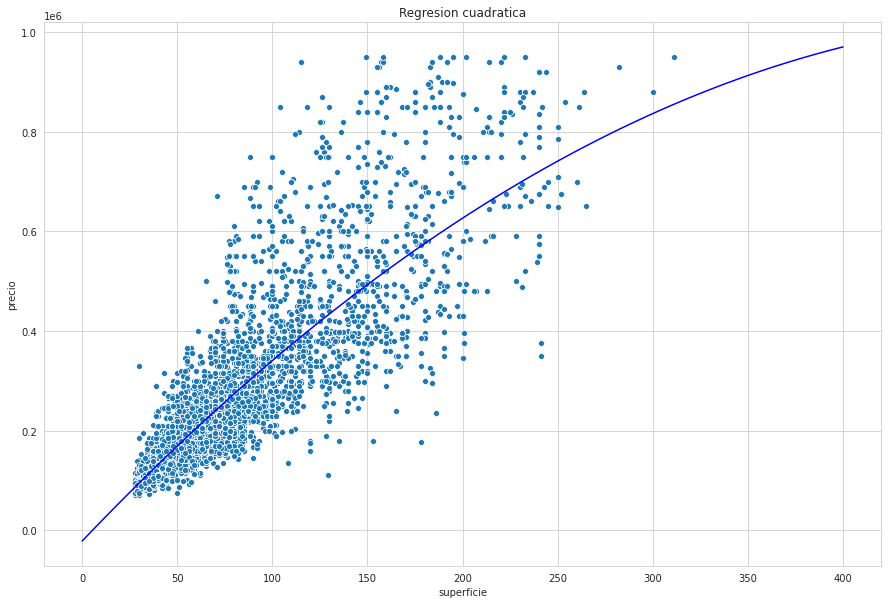

In [ ]:
x_recta = np.linspace(0, 400, 100)

#la nueva recta ahora posee un nuevo componente a diferencia del anterior
y_recta = m * x_recta + k * (x_recta ** 2)+ b

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(x_recta, y_recta, c = 'b')
sns.scatterplot(x = 'superficie',
                y = 'precio',
                data = palermo,
                ax = ax
                )
ax.set_title('Regresion cuadratica')

# Probemos mas grados

In [ ]:
# ahora vamos a probar incluir en la formula un predictor elevado a otro orden, es decir, dado un predictor X, podemos crear un predictor X^2
# para hacer esto, es necesario que agreguemos el termino que querramos elevar dentro de: I(...), veamoslo mejor en el ejemplo

# ARMAR MODELO CON EL PREDICTOR DE SUPERFICIE AL CUBO

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     5844.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:07   Log-Likelihood:                -90949.
No. Observations:                7104   AIC:                         1.819e+05
Df Residuals:                    7100   BIC:                         1.819e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.949e+04   7799

In [ ]:
# nuevamente lo agregamos al diccionario




{'Formula': ['precio ~ cant_hab + cant_bath + superficie',
  'precio ~ cant_hab+superficie',
  'precio ~ superficie * cant_hab',
  'precio ~ superficie + I(superficie**2)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3)'],
 'R2_ajustado': [0.7292518178624021,
  0.7084929901963939,
  0.708789911127224,
  0.711678361698709,
  0.7116428102546926]}

In [ ]:
# IMPORTANTE: en el caso que ya tengamos mas de un coeficiente y querramos ver la prediccion a traves de un DataFrame, existe la posibilidad de 
# utilizar el metodo predict sobre el modelo construido pero es importante que se le asigne un formato de DataFrame acorde al modelo inicial
# haremos un simple ejemplo con 3 datos para ver las predicciones y luego predeciremos el boston completo

prueba = {'superficie':[5, 15, 25]}
prueba = pd.DataFrame(prueba)

model.predict(prueba)

0       37.794722
1    38632.621304
2    76604.391006
dtype: float64

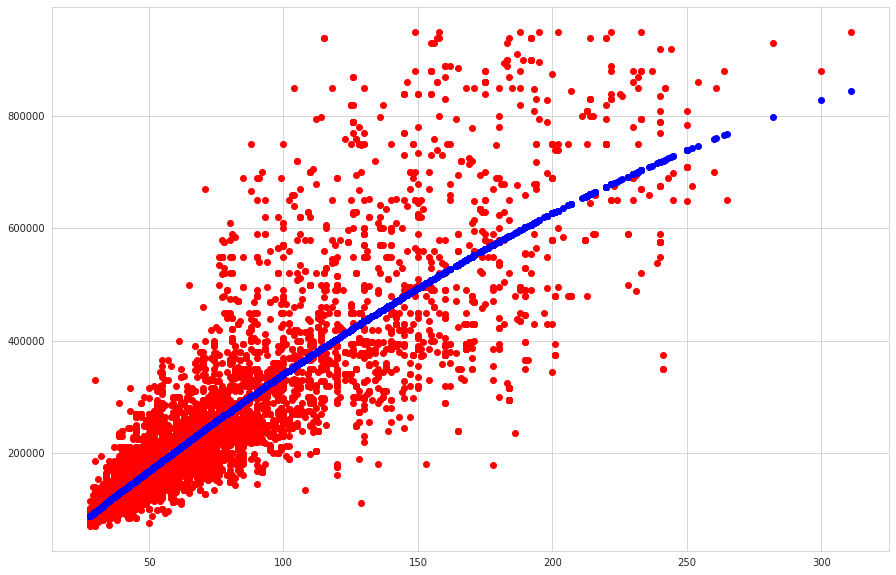

In [ ]:
#cargamos las predicciones en la variable preciopred y luego la utilizamos para plotear
preciopred = model.predict(palermo)

fig, ax = plt.subplots(1, figsize = (15,10))

ax.scatter(palermo['superficie'], palermo['precio'], c = 'r')
ax.scatter(palermo['superficie'], preciopred, c = 'b')

plt.show()

In [ ]:
# ahora hagamos una prediccion de un orden superior

formula = 'precio ~ superficie + I(superficie**2) + I(superficie**3) + I(superficie**4) + I(superficie**5) + I(superficie**6) + I(superficie**7) + I(superficie**8) + I(superficie**9) + I(superficie**10)'
model = smf.ols(formula, data = palermo).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     2124.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:08   Log-Likelihood:                -91354.
No. Observations:                7104   AIC:                         1.827e+05
Df Residuals:                    7096   BIC:                         1.828e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.829e-05   7

In [ ]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['precio ~ cant_hab + cant_bath + superficie',
  'precio ~ cant_hab+superficie',
  'precio ~ superficie * cant_hab',
  'precio ~ superficie + I(superficie**2)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3) + I(superficie**4) + I(superficie**5) + I(superficie**6) + I(superficie**7) + I(superficie**8) + I(superficie**9) + I(superficie**10)'],
 'R2_ajustado': [0.7292518178624021,
  0.7084929901963939,
  0.708789911127224,
  0.711678361698709,
  0.7116428102546926,
  0.6765870881800695]}

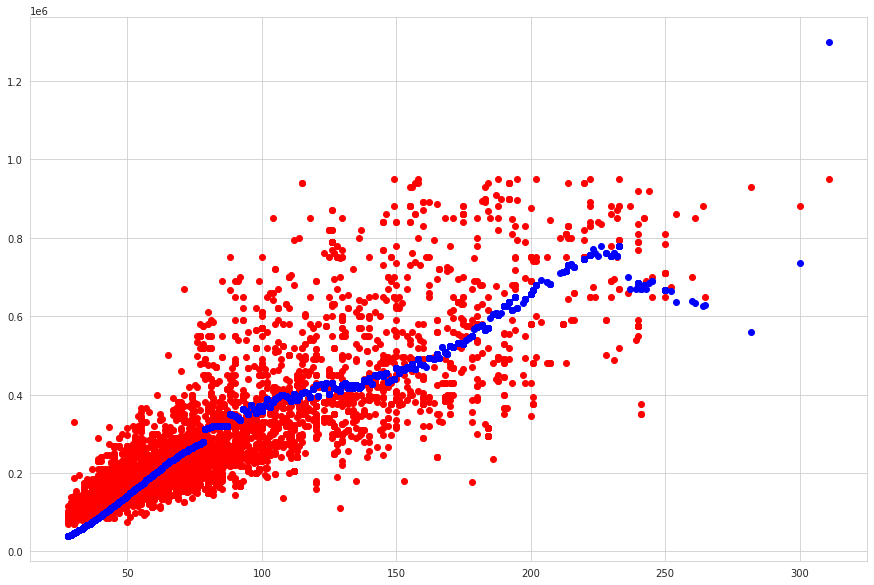

In [ ]:
#cargamos las predicciones en la variable preciopred y luego la utilizamos para plotear


# PREDECIR LOS VALORES DEL DATASET

# GRAFICAR

# Regresion polinomial multiple

In [ ]:
# lo bueno de este metodo es que no importa el tipo de transformacion que querramos hacer, siempre la notacion es la misma.

formula = 'precio ~ superficie + I(superficie**2) + cant_hab + I(cant_hab**2) + I(cant_hab**3)'

model = smf.ols(formula, data = palermo).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     3512.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:08   Log-Likelihood:                -90944.
No. Observations:                7104   AIC:                         1.819e+05
Df Residuals:                    7098   BIC:                         1.819e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.017e+04   8364

In [ ]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['precio ~ cant_hab + cant_bath + superficie',
  'precio ~ cant_hab+superficie',
  'precio ~ superficie * cant_hab',
  'precio ~ superficie + I(superficie**2)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3) + I(superficie**4) + I(superficie**5) + I(superficie**6) + I(superficie**7) + I(superficie**8) + I(superficie**9) + I(superficie**10)',
  'precio ~ superficie + I(superficie**2) + cant_hab + I(cant_hab**2) + I(cant_hab**3)'],
 'R2_ajustado': [0.7292518178624021,
  0.7084929901963939,
  0.708789911127224,
  0.711678361698709,
  0.7116428102546926,
  0.6765870881800695,
  0.7119490987192896]}

# Regresion logaritmica

In [ ]:
# por supuesto, no estamos de ninguna manera restringidos al uso de transformaciones de los predictores
# Ahora vamos a intentar una transformacion logaritmica

formula = 'precio ~ np.log(superficie)'

model = smf.ols(formula, data = palermo).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:08   Log-Likelihood:                -91356.
No. Observations:                7104   AIC:                         1.827e+05
Df Residuals:                    7102   BIC:                         1.827e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -8.736e+05   9301

In [ ]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['precio ~ cant_hab + cant_bath + superficie',
  'precio ~ cant_hab+superficie',
  'precio ~ superficie * cant_hab',
  'precio ~ superficie + I(superficie**2)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3) + I(superficie**4) + I(superficie**5) + I(superficie**6) + I(superficie**7) + I(superficie**8) + I(superficie**9) + I(superficie**10)',
  'precio ~ superficie + I(superficie**2) + cant_hab + I(cant_hab**2) + I(cant_hab**3)',
  'precio ~ np.log(superficie)'],
 'R2_ajustado': [0.7292518178624021,
  0.7084929901963939,
  0.708789911127224,
  0.711678361698709,
  0.7116428102546926,
  0.6765870881800695,
  0.7119490987192896,
  0.6766639972161967]}

In [ ]:
# y tambien, porque no aplicar una transformacion sobre la variable objetivo

formula = 'np.log(precio) ~ superficie + I(superficie**2) + I(superficie**3) + I(superficie**4)'

model = smf.ols(formula, data = palermo).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(precio)   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     6584.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:54:08   Log-Likelihood:                -258.37
No. Observations:                7104   AIC:                             526.7
Df Residuals:                    7099   BIC:                             561.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.6168      0

In [ ]:
# nuevamente lo agregamos al diccionario
modelos['Formula'].append(formula)
modelos['R2_ajustado'].append(model.rsquared_adj)
modelos

{'Formula': ['precio ~ cant_hab + cant_bath + superficie',
  'precio ~ cant_hab+superficie',
  'precio ~ superficie * cant_hab',
  'precio ~ superficie + I(superficie**2)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3)',
  'precio ~ superficie + I(superficie**2) + I(superficie**3) + I(superficie**4) + I(superficie**5) + I(superficie**6) + I(superficie**7) + I(superficie**8) + I(superficie**9) + I(superficie**10)',
  'precio ~ superficie + I(superficie**2) + cant_hab + I(cant_hab**2) + I(cant_hab**3)',
  'precio ~ np.log(superficie)',
  'np.log(precio) ~ superficie + I(superficie**2) + I(superficie**3) + I(superficie**4)'],
 'R2_ajustado': [0.7292518178624021,
  0.7084929901963939,
  0.708789911127224,
  0.711678361698709,
  0.7116428102546926,
  0.6765870881800695,
  0.7119490987192896,
  0.6766639972161967,
  0.7875505582000673]}

In [ ]:
# Para mejorar la visualizacion de los datos recolectados en el diccionario, transformaremos el mismo en un DataFrame

modelos = pd.DataFrame(modelos)
modelos

,Formula,R2_ajustado
0,precio ~ cant_hab + cant_bath + superficie,0.729252
1,precio ~ cant_hab+superficie,0.708493
2,precio ~ superficie * cant_hab,0.708790
3,precio ~ superficie + I(superficie**2),0.711678
4,precio ~ superficie + I(superficie**2) + I(sup...,0.711643
5,precio ~ superficie + I(superficie**2) + I(sup...,0.676587
6,precio ~ superficie + I(superficie**2) + cant_...,0.711949
7,precio ~ np.log(superficie),0.676664
8,np.log(precio) ~ superficie + I(superficie**2)...,0.787551


# ACTIVIDADES:

## - Plotear todos los modelos, de ayuda vamos a citar el codigo que nos servira para el ejercicio.
        preciopred = model.predict(palermo)

        fig, ax = plt.subplots(1, figsize = (15,10))
        ax.scatter(palermo['superficie'], preciopred, c = 'b')
        ax.scatter(palermo['superficie'], palermo['precio'], c = 'r')
        plt.show()

## - Realizar un script que permita hacer un stepwise o stepfoward para encontrar el modelo con el mayor R2 ajustado.